Usecase of SVM machine learning algorithm to build and train a model based on a human cell records, and then classify cells to find out whether they are benign or malignant.

SVM works by trasnforming a low-dimensional data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***Field Descriptions:***

> ID: Identifier

> Clump: Clump thickness

> Unifsize: Uniformity of cell size

> UnifShape: Uniformity of cell shape

> MargAdh: Marginal adhesion

> SingEpiSize: Single epithelial cell size

> BareNuc: Bare nuclei

> BlandChrom: Bland Chromatin

> NormNucl: Normal nucleoli

> Mit: Mitosis

> Class (Target column/feature): Benign or Malignant 


***1. Reading the Dataset***

In [2]:
df = pd.read_csv(r'c:\Users\sanju\Desktop\cell_samples.csv')
df.sample(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
437,527337,4,1,1,1,2,1,1,1,1,2
470,1211594,3,1,1,1,1,1,2,1,1,2
667,1348851,3,1,1,1,2,1,3,1,1,2
241,1276091,3,1,1,3,1,1,3,1,1,2
263,303213,10,4,4,10,6,10,5,5,1,4
692,714039,3,1,1,1,2,1,1,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
630,1225382,6,2,3,1,2,1,1,1,1,2
48,1106095,4,1,1,3,2,1,3,1,1,2
530,837480,7,4,4,3,4,10,6,9,1,4


In [3]:
# unique classes (Benign or Malignant)
df.Class.unique()
# Benign: 2 
# Malignant: 4

array([2, 4], dtype=int64)

In [4]:
df.Class.value_counts() # no of each classes

Class
2    458
4    241
Name: count, dtype: int64

In [5]:
df.shape # no of records (Rows) and features (columns)

(699, 11)

In [6]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

***2. Distribuition of Classes***

In [7]:
# choosing Malignant records
cond = df['Class'] == 4
df_Malignant = df[cond] 

df_Malignant.sample(7)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
104,1168736,10,10,10,10,10,1,8,8,8,4
46,1105257,3,7,7,4,4,9,4,8,1,4
263,303213,10,4,4,10,6,10,5,5,1,4
20,1054590,7,3,2,10,5,10,5,4,4,4
610,736150,10,4,3,10,3,10,7,1,2,4
568,1343068,8,4,4,1,6,10,2,5,2,4
41,1099510,10,4,3,1,3,3,6,5,2,4


In [8]:
# choosing Benign records
cond = df['Class'] == 2
df_Benign = df[cond] 

df_Benign.sample(7)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
690,654546,1,1,1,3,2,1,1,1,1,2
80,1137156,2,2,2,1,1,1,7,1,1,2
458,1266124,5,1,2,1,2,1,1,1,1,2
379,685977,5,3,4,1,4,1,3,1,1,2
81,1143978,4,1,1,2,2,1,2,1,1,2
438,558538,4,1,3,3,2,1,1,1,1,2
182,1204898,6,1,1,1,2,1,3,1,1,2


<Axes: xlabel='Clump', ylabel='UnifSize'>

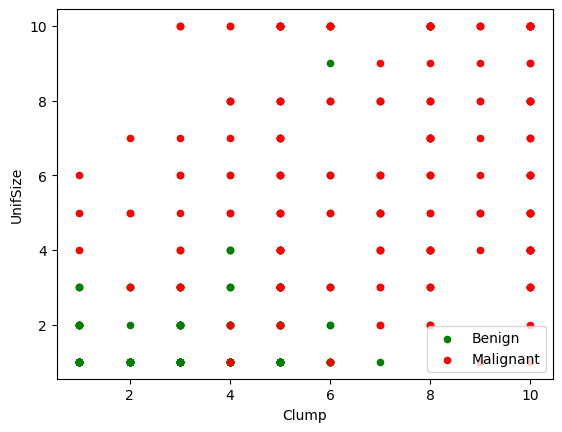

In [9]:
# help(df_Benign.plot)
axes = df_Benign.plot(kind='scatter', 
               x= 'Clump', y= 'UnifSize',
               color='green',
               label= 'Benign')

df_Malignant.plot(kind='scatter', 
               x= 'Clump', y= 'UnifSize',
               color='red',
               label= 'Malignant', ax= axes)

***4. Indetifying and Removing Unwanted Columns***

In [10]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

We can remove non-numeric columns or apply `encoding` to transform non-numeric columns to numeric columns

In [11]:
# changing the column into numeric 

# changing only those columns which don't have any null value
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors= 'coerce').notnull() 
#coerce argument set invalid parsing as NaN

# now changing data types
df['BareNuc'] = df['BareNuc'].astype('int64')

In [12]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [13]:
# removing unwanted columns
df.drop(labels= 'ID', inplace= True, axis= 1) #we don't need ID column
df.sample(5)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
3,6,8,8,1,3,1,3,7,1,2
519,4,7,8,3,4,1,9,1,1,4
267,3,3,5,2,3,1,7,1,1,4
483,8,7,8,5,5,1,9,10,1,4
12,5,3,3,3,2,1,4,4,1,4


***5. Test-Train Split***

In [21]:
# Dividing dataset into independent and dependent data
X = df.iloc[:, :9]
Y = df.Class
Y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                    random_state= 4,
                                                    test_size= 0.2)
# genrates List containing train-test split of inputs.

***6. SVM Model Building***

In [56]:
from sklearn.svm import SVC

model = SVC( kernel= 'linear',
            C= 10, 
            gamma= 'auto')  # kernel coefficient. if 'auto' then uses 1/ n_features
                                                    #'scale' then 1/(n_features * X.var())   
# fitting the data
model.fit(x_train, y_train)                                                    

SVC(C=10, gamma='auto', kernel='linear')

In [57]:
# prediction
y_predict = model.predict(x_test)

***7. Evaluation***

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97        88
           4       0.98      0.90      0.94        52

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9571428571428572